In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features8.csv')
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,35,36,37,38,39,40,41,42,43,English Type
0,0.503926,2863.528511,3068.590795,5091.295974,0.075223,-330.49750,-5.631140e-02,-1.305158e-02,129.82634,5.654399e-04,...,-2.752345,-1.821501e-03,9.363368e-04,-4.558670,6.158995e-03,3.925575e-03,-0.389210,1.502641e-03,2.480886e-03,1
1,0.387303,2366.006257,2395.289588,4699.281629,0.065283,-322.01425,-3.602875e-03,-2.423903e-02,128.47772,-6.527488e-03,...,-1.544018,7.676435e-03,7.934333e-04,-1.401703,5.644315e-03,-5.167238e-04,-5.707905,-2.998314e-03,1.379392e-04,0
2,0.447855,4385.587175,3884.844459,8003.728725,0.136615,-340.64084,-1.116015e-02,-1.194324e-02,97.25810,-4.836332e-03,...,-10.403498,-6.431966e-03,6.693075e-04,0.850455,-6.629119e-04,-1.358620e-03,-11.889046,-1.693906e-03,1.692394e-04,0
3,0.486216,2358.214724,2081.928649,4239.875408,0.072844,-377.72028,2.176717e-08,-6.462130e-09,140.99352,3.265076e-08,...,-4.418817,0.000000e+00,-2.380785e-09,-4.824514,-3.401121e-10,1.020336e-09,-3.209569,0.000000e+00,1.211649e-09,0
4,0.470306,2690.409490,3108.192676,5306.686114,0.048585,-330.79733,-9.279275e-03,3.626792e-03,98.38888,2.809254e-03,...,-0.268788,-2.190437e-03,1.166201e-03,-1.180020,-6.167702e-04,-1.668033e-03,0.379468,-3.115617e-03,2.192514e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.426552,3645.447879,3456.966248,6460.066901,0.104180,-321.37543,2.145348e-08,-1.592251e-09,125.37948,8.045056e-09,...,-5.950925,2.681685e-09,-2.430277e-09,-10.296289,6.704213e-10,5.195765e-09,-6.076538,-1.340843e-09,4.190133e-11,0
2134,0.444152,3273.783853,3329.220097,6173.545193,0.093596,-334.67572,2.969725e-03,-7.079506e-03,115.60187,2.633094e-03,...,-22.601553,-3.429410e-03,-3.406802e-04,-8.010031,3.347575e-04,1.722395e-04,-8.633924,2.589215e-03,-7.905327e-05,0
2135,0.383148,3670.118530,3253.610481,6407.672935,0.100979,-237.90643,2.993488e-02,-6.727289e-03,103.26113,3.290961e-02,...,-3.508986,-5.677356e-04,-7.979744e-04,-8.856752,3.319585e-05,-1.515660e-04,-2.979901,-5.256697e-04,1.029256e-03,0
2136,0.408675,3054.049136,3250.488592,5473.606375,0.082966,-312.73398,5.774686e-02,2.157346e-04,130.01166,4.117964e-02,...,-1.335617,-9.031654e-05,2.355064e-03,-6.252686,-1.106754e-03,1.026079e-03,-0.870628,-1.179720e-03,-9.064542e-04,0


In [3]:
X = df.iloc[:,0:44]
y = df.iloc[:,44]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1496, 44) (1496,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=32,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
47/47 [==============================] - 2s 12ms/step - loss: 1.1514 - val_loss: 0.9881
Epoch 2/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.9769 - val_loss: 0.8721
Epoch 3/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.8944 - val_loss: 0.8216
Epoch 4/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.8525 - val_loss: 0.7893
Epoch 5/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.8223 - val_loss: 0.7634
Epoch 6/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.7979 - val_loss: 0.7425
Epoch 7/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.7781 - val_loss: 0.7261
Epoch 8/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.7619 - val_loss: 0.7124
Epoch 9/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.7482 - val_loss: 0.7007
Epoch 10/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.7364 - val_loss: 0.690

47/47 [==============================] - 0s 6ms/step - loss: 0.6175 - val_loss: 0.5788
Epoch 83/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6173 - val_loss: 0.5786
Epoch 84/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.5783
Epoch 85/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.5781
Epoch 86/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.5779
Epoch 87/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6166 - val_loss: 0.5777
Epoch 88/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6165 - val_loss: 0.5774
Epoch 89/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6163 - val_loss: 0.5772
Epoch 90/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6161 - val_loss: 0.5770
Epoch 91/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.5767
Epoc

47/47 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5698
Epoch 163/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5698
Epoch 164/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5698
Epoch 165/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6110 - val_loss: 0.5697
Epoch 166/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.5697
Epoch 167/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.5696
Epoch 168/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6110 - val_loss: 0.5697
Epoch 169/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.6110 - val_loss: 0.5696
Epoch 170/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6109 - val_loss: 0.5695
Epoch 171/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.

47/47 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.5679
Epoch 243/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5679
Epoch 244/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5679
Epoch 245/1500
47/47 [==============================] - 0s 6ms/step - loss: 0.6100 - val_loss: 0.5679
Epoch 246/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5678
Epoch 247/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5678
Epoch 248/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5678
Epoch 249/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.5678
Epoch 250/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6100 - val_loss: 0.5678
Epoch 251/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5674
Epoch 323/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 324/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 325/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 326/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5674
Epoch 327/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 328/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 329/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 330/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5673
Epoch 331/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 403/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 404/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 405/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 406/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 407/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 408/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 409/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 410/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.5671
Epoch 411/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6096 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 483/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 484/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 485/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 486/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 487/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 488/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 489/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 490/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 491/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 563/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 564/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 565/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 566/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 567/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 568/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 569/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 570/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 571/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 643/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 644/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5671
Epoch 645/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 646/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 647/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 648/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 649/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 650/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 651/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 723/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 724/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 725/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 726/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 727/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 728/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 729/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 730/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6095 - val_loss: 0.5670
Epoch 731/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 803/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 804/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 805/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 806/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 807/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 808/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 809/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 810/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 811/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 883/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 884/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 885/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 886/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 887/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 888/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 889/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 890/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 891/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 963/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 964/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 965/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 966/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 967/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 968/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 969/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 970/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 971/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1043/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1044/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1045/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1046/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1047/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1048/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1049/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1050/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1051/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1122/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1123/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1124/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1125/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1126/1500
47/47 [==============================] - 0s 5ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1127/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1128/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1129/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1130/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - va

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1201/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1202/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1203/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1204/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1205/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1206/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1207/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1208/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1209/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1280/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1281/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1282/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1283/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1284/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1285/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1286/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1287/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1288/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1359/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1360/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1361/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1362/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1363/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1364/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1365/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1366/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1367/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val

47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1438/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1439/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1440/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1441/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1442/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1443/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.5670
Epoch 1444/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1445/1500
47/47 [==============================] - 0s 3ms/step - loss: 0.6094 - val_loss: 0.5671
Epoch 1446/1500
47/47 [==============================] - 0s 4ms/step - loss: 0.6094 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8286604361370716
Precision:  0.6866781184188817
Recall:  0.8286604361370716
F1-score:  0.7510176354768691
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       532
           1       0.00      0.00      0.00       110

    accuracy                           0.83       642
   macro avg       0.41      0.50      0.45       642
weighted avg       0.69      0.83      0.75       642



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 82.40%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


# Print classification report
print(classification_report(y_test, y_pred))


Accuracy:  0.82398753894081
Precision:  0.76731759719705
Recall:  0.82398753894081
F1-score:  0.7709902420352208
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       532
           1       0.43      0.08      0.14       110

    accuracy                           0.82       642
   macro avg       0.63      0.53      0.52       642
weighted avg       0.77      0.82      0.77       642



# CNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [11]:
X = df.iloc[:,0:44]
y = df.iloc[:,44]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [13]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [14]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=32,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
47/47 [==============================] - 2s 17ms/step - loss: 39.2774 - accuracy: 0.7039 - val_loss: 2.5811 - val_accuracy: 0.5249
Epoch 2/1500
47/47 [==============================] - 0s 10ms/step - loss: 4.9208 - accuracy: 0.7219 - val_loss: 4.8282 - val_accuracy: 0.8287
Epoch 3/1500
47/47 [==============================] - 1s 11ms/step - loss: 3.4139 - accuracy: 0.7233 - val_loss: 1.0420 - val_accuracy: 0.5187
Epoch 4/1500
47/47 [==============================] - 0s 10ms/step - loss: 1.7904 - accuracy: 0.7246 - val_loss: 0.6265 - val_accuracy: 0.6542
Epoch 5/1500
47/47 [==============================] - 0s 10ms/step - loss: 1.1027 - accuracy: 0.7406 - val_loss: 0.5905 - val_accuracy: 0.8287
Epoch 6/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.8808 - accuracy: 0.7393 - val_loss: 0.4448 - val_accuracy: 0.8131
Epoch 7/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.5799 - accuracy: 0.7841 - val_loss: 0.6653 - val_accuracy: 0.607

47/47 [==============================] - 0s 9ms/step - loss: 0.4035 - accuracy: 0.8309 - val_loss: 0.4437 - val_accuracy: 0.8193
Epoch 59/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3978 - accuracy: 0.8356 - val_loss: 0.4430 - val_accuracy: 0.8287
Epoch 60/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.4027 - accuracy: 0.8275 - val_loss: 0.4311 - val_accuracy: 0.8240
Epoch 61/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4351 - val_accuracy: 0.8287
Epoch 62/1500
47/47 [==============================] - 1s 14ms/step - loss: 0.3945 - accuracy: 0.8376 - val_loss: 0.4341 - val_accuracy: 0.8287
Epoch 63/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.3918 - accuracy: 0.8329 - val_loss: 0.4354 - val_accuracy: 0.8240
Epoch 64/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.3859 - accuracy: 0.8302 - val_loss: 0.4378 - val_accuracy: 0.8333
Epoch 65/150

47/47 [==============================] - 0s 10ms/step - loss: 0.1927 - accuracy: 0.9158 - val_loss: 0.6463 - val_accuracy: 0.8100
Epoch 116/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.2115 - accuracy: 0.9064 - val_loss: 0.6195 - val_accuracy: 0.8100
Epoch 117/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.1754 - accuracy: 0.9265 - val_loss: 0.6169 - val_accuracy: 0.7788
Epoch 118/1500
47/47 [==============================] - 1s 13ms/step - loss: 0.1933 - accuracy: 0.9151 - val_loss: 0.6184 - val_accuracy: 0.8006
Epoch 119/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.1799 - accuracy: 0.9231 - val_loss: 0.6631 - val_accuracy: 0.8209
Epoch 120/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.1907 - accuracy: 0.9238 - val_loss: 0.6744 - val_accuracy: 0.7866
Epoch 121/1500
47/47 [==============================] - 1s 14ms/step - loss: 0.1782 - accuracy: 0.9291 - val_loss: 0.6778 - val_accuracy: 0.8037
Epo

Epoch 172/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0740 - accuracy: 0.9759 - val_loss: 1.0790 - val_accuracy: 0.7835
Epoch 173/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.0858 - accuracy: 0.9686 - val_loss: 1.0665 - val_accuracy: 0.8053
Epoch 174/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0774 - accuracy: 0.9713 - val_loss: 1.0044 - val_accuracy: 0.7944
Epoch 175/1500
47/47 [==============================] - 1s 14ms/step - loss: 0.0797 - accuracy: 0.9699 - val_loss: 1.0575 - val_accuracy: 0.8069
Epoch 176/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0755 - accuracy: 0.9759 - val_loss: 1.1655 - val_accuracy: 0.7913
Epoch 177/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0801 - accuracy: 0.9686 - val_loss: 1.1235 - val_accuracy: 0.8022
Epoch 178/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0812 - accuracy: 0.9666 - val_loss: 1.0884 - val_accura

Epoch 229/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9846 - val_loss: 1.3109 - val_accuracy: 0.7975
Epoch 230/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 1.3380 - val_accuracy: 0.7913
Epoch 231/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 1.3534 - val_accuracy: 0.7850
Epoch 232/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 1.5986 - val_accuracy: 0.8006
Epoch 233/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 1.4671 - val_accuracy: 0.8069
Epoch 234/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0408 - accuracy: 0.9860 - val_loss: 1.2730 - val_accuracy: 0.7882
Epoch 235/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9873 - val_loss: 1.3561 - val_accurac

Epoch 286/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 1.5925 - val_accuracy: 0.7866
Epoch 287/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 0.9866 - val_loss: 1.5529 - val_accuracy: 0.7788
Epoch 288/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 1.6027 - val_accuracy: 0.7960
Epoch 289/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 1.6207 - val_accuracy: 0.7975
Epoch 290/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9886 - val_loss: 1.6183 - val_accuracy: 0.7819
Epoch 291/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0272 - accuracy: 0.9893 - val_loss: 1.6588 - val_accuracy: 0.7866
Epoch 292/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 1.5955 - val_accur

Epoch 343/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0288 - accuracy: 0.9893 - val_loss: 1.6936 - val_accuracy: 0.8006
Epoch 344/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9920 - val_loss: 1.6513 - val_accuracy: 0.7850
Epoch 345/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 1.6419 - val_accuracy: 0.7741
Epoch 346/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.9913 - val_loss: 1.6472 - val_accuracy: 0.7726
Epoch 347/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 1.6230 - val_accuracy: 0.7757
Epoch 348/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 1.7636 - val_accuracy: 0.8006
Epoch 349/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 1.7218 - val_accuracy:

Epoch 400/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 1.9377 - val_accuracy: 0.8037
Epoch 401/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 1.9241 - val_accuracy: 0.7897
Epoch 402/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0198 - accuracy: 0.9926 - val_loss: 1.8825 - val_accuracy: 0.7882
Epoch 403/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 1.7929 - val_accuracy: 0.7882
Epoch 404/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0211 - accuracy: 0.9926 - val_loss: 1.9043 - val_accuracy: 0.7928
Epoch 405/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.9913 - val_loss: 1.7664 - val_accuracy: 0.8006
Epoch 406/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 1.9613 - val_accuracy

Epoch 457/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.9973 - val_loss: 2.0202 - val_accuracy: 0.7913
Epoch 458/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 0.9973 - val_loss: 1.8679 - val_accuracy: 0.7897
Epoch 459/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 1.9679 - val_accuracy: 0.8006
Epoch 460/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.9933 - val_loss: 2.0063 - val_accuracy: 0.7866
Epoch 461/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9947 - val_loss: 2.0482 - val_accuracy: 0.7897
Epoch 462/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 2.0573 - val_accuracy: 0.7960
Epoch 463/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 2.0212 - val_accuracy:

Epoch 514/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 2.1064 - val_accuracy: 0.8022
Epoch 515/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0205 - accuracy: 0.9947 - val_loss: 2.0470 - val_accuracy: 0.7944
Epoch 516/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 2.1007 - val_accuracy: 0.7944
Epoch 517/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0216 - accuracy: 0.9940 - val_loss: 1.9469 - val_accuracy: 0.7773
Epoch 518/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 0.9926 - val_loss: 1.9189 - val_accuracy: 0.7850
Epoch 519/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 1.9409 - val_accuracy: 0.7897
Epoch 520/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9940 - val_loss: 1.9296 - val_accurac

Epoch 571/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0139 - accuracy: 0.9933 - val_loss: 2.4995 - val_accuracy: 0.7882
Epoch 572/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 2.2555 - val_accuracy: 0.7850
Epoch 573/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 2.2992 - val_accuracy: 0.7757
Epoch 574/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9933 - val_loss: 2.3587 - val_accuracy: 0.7882
Epoch 575/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 2.3216 - val_accuracy: 0.7882
Epoch 576/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 2.3249 - val_accuracy: 0.7757
Epoch 577/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 2.2793 - val_accuracy:

Epoch 628/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 2.2954 - val_accuracy: 0.7695
Epoch 629/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 2.2228 - val_accuracy: 0.7804
Epoch 630/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 2.1938 - val_accuracy: 0.7788
Epoch 631/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 2.1791 - val_accuracy: 0.7897
Epoch 632/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 2.2432 - val_accuracy: 0.7804
Epoch 633/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.2863 - val_accuracy: 0.7866
Epoch 634/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.9967 - val_loss: 2.2055 - val_accuracy

Epoch 685/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 2.2151 - val_accuracy: 0.7913
Epoch 686/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 2.3020 - val_accuracy: 0.7928
Epoch 687/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 2.2607 - val_accuracy: 0.7850
Epoch 688/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9947 - val_loss: 2.4218 - val_accuracy: 0.8115
Epoch 689/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0386 - accuracy: 0.9860 - val_loss: 2.2448 - val_accuracy: 0.7664
Epoch 690/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.9893 - val_loss: 2.4185 - val_accuracy: 0.7819
Epoch 691/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.9913 - val_loss: 2.3283 - val_accuracy:

Epoch 742/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.9933 - val_loss: 2.2320 - val_accuracy: 0.7882
Epoch 743/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.9967 - val_loss: 2.3002 - val_accuracy: 0.7773
Epoch 744/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 2.3733 - val_accuracy: 0.7835
Epoch 745/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9940 - val_loss: 2.4510 - val_accuracy: 0.7897
Epoch 746/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 2.2140 - val_accuracy: 0.7664
Epoch 747/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 2.3761 - val_accuracy: 0.7913
Epoch 748/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 2.3484 - val_accuracy:

Epoch 799/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0294 - accuracy: 0.9926 - val_loss: 2.2791 - val_accuracy: 0.7741
Epoch 800/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.9906 - val_loss: 2.4330 - val_accuracy: 0.7835
Epoch 801/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 2.3582 - val_accuracy: 0.7991
Epoch 802/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0299 - accuracy: 0.9926 - val_loss: 2.2701 - val_accuracy: 0.7913
Epoch 803/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.9973 - val_loss: 2.3265 - val_accuracy: 0.8006
Epoch 804/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 2.1671 - val_accuracy: 0.7850
Epoch 805/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 2.2124 - val_accuracy:

Epoch 856/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 2.4573 - val_accuracy: 0.7773
Epoch 857/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 2.2561 - val_accuracy: 0.7991
Epoch 858/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0366 - accuracy: 0.9933 - val_loss: 2.3901 - val_accuracy: 0.7897
Epoch 859/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 0.9953 - val_loss: 2.1834 - val_accuracy: 0.7741
Epoch 860/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9933 - val_loss: 2.4488 - val_accuracy: 0.7960
Epoch 861/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9973 - val_loss: 2.4190 - val_accuracy: 0.7835
Epoch 862/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 2.3628 - val_accuracy:

Epoch 913/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 2.5687 - val_accuracy: 0.7913
Epoch 914/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9947 - val_loss: 2.5111 - val_accuracy: 0.7928
Epoch 915/1500
47/47 [==============================] - 1s 13ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 2.5539 - val_accuracy: 0.7897
Epoch 916/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 2.5233 - val_accuracy: 0.7960
Epoch 917/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.0058 - accuracy: 0.9973 - val_loss: 2.4873 - val_accuracy: 0.7757
Epoch 918/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 0.9980 - val_loss: 2.4973 - val_accuracy: 0.7835
Epoch 919/1500
47/47 [==============================] - 1s 12ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 2.3453 - val_accura

Epoch 970/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0072 - accuracy: 0.9953 - val_loss: 2.6618 - val_accuracy: 0.7788
Epoch 971/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 2.6200 - val_accuracy: 0.7850
Epoch 972/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 2.6683 - val_accuracy: 0.7866
Epoch 973/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 2.7661 - val_accuracy: 0.7819
Epoch 974/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 2.6508 - val_accuracy: 0.7726
Epoch 975/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 2.5994 - val_accuracy: 0.7773
Epoch 976/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 2.5548 - val_ac

47/47 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 2.6000 - val_accuracy: 0.7835
Epoch 1027/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 2.6338 - val_accuracy: 0.7741
Epoch 1028/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9980 - val_loss: 2.5595 - val_accuracy: 0.7897
Epoch 1029/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9953 - val_loss: 2.5990 - val_accuracy: 0.7773
Epoch 1030/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9967 - val_loss: 2.6468 - val_accuracy: 0.7944
Epoch 1031/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.9933 - val_loss: 2.6918 - val_accuracy: 0.7928
Epoch 1032/1500
47/47 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 2.6343 - val_accuracy: 0.7835
E

47/47 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.9953 - val_loss: 2.6540 - val_accuracy: 0.7850
Epoch 1083/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 2.6928 - val_accuracy: 0.7850
Epoch 1084/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 2.6949 - val_accuracy: 0.7866
Epoch 1085/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 2.8572 - val_accuracy: 0.7913
Epoch 1086/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 0.9973 - val_loss: 2.7781 - val_accuracy: 0.7850
Epoch 1087/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 2.6120 - val_accuracy: 0.7773
Epoch 1088/1500
47/47 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 2.8102 - val_accuracy: 0.7944
E

47/47 [==============================] - 0s 10ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 2.6204 - val_accuracy: 0.7897
Epoch 1139/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 2.7049 - val_accuracy: 0.8053
Epoch 1140/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 2.5583 - val_accuracy: 0.8022
Epoch 1141/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 2.5048 - val_accuracy: 0.7960
Epoch 1142/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 2.5251 - val_accuracy: 0.7928
Epoch 1143/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 2.5004 - val_accuracy: 0.7882
Epoch 1144/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.9960 - val_loss: 2.5849 - val_accuracy: 0

47/47 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9953 - val_loss: 2.6091 - val_accuracy: 0.7679
Epoch 1195/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0042 - accuracy: 0.9980 - val_loss: 2.5448 - val_accuracy: 0.7570
Epoch 1196/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 2.5748 - val_accuracy: 0.7866
Epoch 1197/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 2.6758 - val_accuracy: 0.7710
Epoch 1198/1500
47/47 [==============================] - 1s 11ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 2.8710 - val_accuracy: 0.7928
Epoch 1199/1500
47/47 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 2.7358 - val_accuracy: 0.7757
Epoch 1200/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 0.9973 - val_loss: 2.8130 - val_accuracy: 0.7850

47/47 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.6799 - val_accuracy: 0.8053
Epoch 1251/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 2.7147 - val_accuracy: 0.8037
Epoch 1252/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.7843 - val_accuracy: 0.8084
Epoch 1253/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 2.7233 - val_accuracy: 0.7960
Epoch 1254/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 2.8700 - val_accuracy: 0.7960
Epoch 1255/1500
47/47 [==============================] - 0s 11ms/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 2.9523 - val_accuracy: 0.8084
Epoch 1256/1500
47/47 [==============================] - 0s 10ms/step - loss: 0.0152 - accuracy: 0.9980 - val_loss: 2.6749 - val_accuracy: 0

47/47 [==============================] - 1s 15ms/step - loss: 0.0206 - accuracy: 0.9953 - val_loss: 2.7513 - val_accuracy: 0.7960
Epoch 1307/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0067 - accuracy: 0.9960 - val_loss: 2.7239 - val_accuracy: 0.7944
Epoch 1308/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 2.6722 - val_accuracy: 0.7773
Epoch 1309/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 2.7974 - val_accuracy: 0.7850
Epoch 1310/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 2.7841 - val_accuracy: 0.7960
Epoch 1311/1500
47/47 [==============================] - 1s 16ms/step - loss: 0.0115 - accuracy: 0.9980 - val_loss: 2.7242 - val_accuracy: 0.7726
Epoch 1312/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 2.6826 - val_accuracy: 0

47/47 [==============================] - 1s 15ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 2.6037 - val_accuracy: 0.7928
Epoch 1363/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 2.6931 - val_accuracy: 0.8037
Epoch 1364/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 2.6615 - val_accuracy: 0.8069
Epoch 1365/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0031 - accuracy: 0.9980 - val_loss: 2.7257 - val_accuracy: 0.7975
Epoch 1366/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 2.6885 - val_accuracy: 0.8037
Epoch 1367/1500
47/47 [==============================] - 1s 18ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 2.6748 - val_accuracy: 0.8100
Epoch 1368/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 2.6009 - val_accuracy: 0

47/47 [==============================] - 1s 15ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 2.7342 - val_accuracy: 0.7913
Epoch 1419/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0057 - accuracy: 0.9967 - val_loss: 2.8134 - val_accuracy: 0.7944
Epoch 1420/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 3.1940 - val_accuracy: 0.8022
Epoch 1421/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 2.9913 - val_accuracy: 0.7804
Epoch 1422/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0223 - accuracy: 0.9960 - val_loss: 2.9431 - val_accuracy: 0.7928
Epoch 1423/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0210 - accuracy: 0.9967 - val_loss: 2.8006 - val_accuracy: 0.7773
Epoch 1424/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 2.6898 - val_accuracy: 0

47/47 [==============================] - 1s 15ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 2.8642 - val_accuracy: 0.7991
Epoch 1475/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0066 - accuracy: 0.9960 - val_loss: 2.9162 - val_accuracy: 0.7819
Epoch 1476/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0062 - accuracy: 0.9967 - val_loss: 2.9434 - val_accuracy: 0.7944
Epoch 1477/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 2.9276 - val_accuracy: 0.7897
Epoch 1478/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 3.0337 - val_accuracy: 0.7991
Epoch 1479/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 3.0415 - val_accuracy: 0.7960
Epoch 1480/1500
47/47 [==============================] - 1s 15ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 3.1608 - val_accuracy: 0

In [15]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 4ms/step
Accuracy: 0.794392523364486


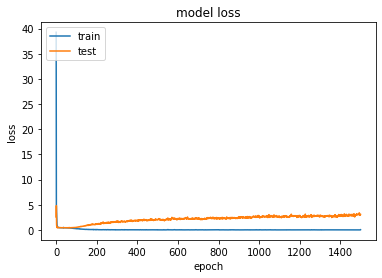

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

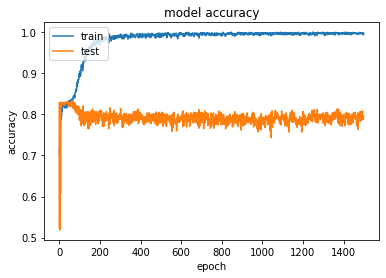

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.84      0.93      0.88       532
           1       0.29      0.14      0.19       110

    accuracy                           0.79       642
   macro avg       0.56      0.53      0.53       642
weighted avg       0.74      0.79      0.76       642

Predict   0         1         
Actual
0         495       37        

1         95        15        





Overall Statistics : 

95% CI                                                            (0.76313,0.82566)
ACC Macro                                                         0.79439
ARI                                                               0.06173
AUNP                                                              0.53341
AUNU                                                              0.53341
Bangdiwala B                                                      0.76737
Bennett S                                                         0.58879
CBA   

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))
print("Precision: ", precision_score(y_test_encoded, y_pred_classes, average='weighted'))
print("Recall: ", recall_score(y_test_encoded, y_pred_classes, average='weighted'))
print("F1-score: ", f1_score(y_test_encoded, y_pred_classes, average='weighted'))


# Print classification report
print(classification_report(y_test_encoded, y_pred_classes))

Accuracy:  0.794392523364486
Precision:  0.7446569350180945
Recall:  0.794392523364486
F1-score:  0.7629005219256273
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       532
           1       0.29      0.14      0.19       110

    accuracy                           0.79       642
   macro avg       0.56      0.53      0.53       642
weighted avg       0.74      0.79      0.76       642

